# Fixed policy optimization visuals

In [7]:
from skopt import load
from skopt.plots import plot_objective
from huggingface_hub import hf_hub_download

import numpy as np
import pandas as pd

## Load

In [2]:
cr_UM1_file = hf_hub_download(repo_id="boettiger-lab/rl4eco", filename="sb3/rl4fisheries/post-review-results/cr-UM1-noise01.pkl")
cr_UM2_file = hf_hub_download(repo_id="boettiger-lab/rl4eco", filename="sb3/rl4fisheries/post-review-results/cr-UM2-noise01.pkl")
cr_UM3_file = hf_hub_download(repo_id="boettiger-lab/rl4eco", filename="sb3/rl4fisheries/post-review-results/cr-UM3-noise01.pkl")

msy_UM1_file = hf_hub_download(repo_id="boettiger-lab/rl4eco", filename="sb3/rl4fisheries/post-review-results/msy-UM1-noise01.pkl")
msy_UM2_file = hf_hub_download(repo_id="boettiger-lab/rl4eco", filename="sb3/rl4fisheries/post-review-results/msy-UM2-noise01.pkl")
msy_UM3_file = hf_hub_download(repo_id="boettiger-lab/rl4eco", filename="sb3/rl4fisheries/post-review-results/msy-UM3-noise01.pkl")

In [3]:
cr_UM1 = load(cr_UM1_file)
cr_UM2 = load(cr_UM2_file)
cr_UM3 = load(cr_UM3_file)

msy_UM1 = load(msy_UM1_file)
msy_UM2 = load(msy_UM2_file)
msy_UM3 = load(msy_UM3_file)

## Results

In [17]:
print(cr_UM1.x, cr_UM1.fun)
print(msy_UM1.x, msy_UM1.fun)
print(" ")
print(cr_UM2.x, cr_UM2.fun)
print(msy_UM2.x, msy_UM2.fun)
print(" ")
print(cr_UM3.x, cr_UM3.fun)
print(msy_UM3.x, msy_UM3.fun)

def from_radius_theta(radius, theta, y2):
    x1 = radius * np.sin(theta)
    x2 = radius * np.cos(theta)
    return [x1, x2, y2]

um1_cr_pars = from_radius_theta(*cr_UM1.x)
um2_cr_pars = from_radius_theta(*cr_UM2.x)
um3_cr_pars = from_radius_theta(*cr_UM3.x)

index = pd.MultiIndex.from_tuples([
    ('FMSY', 'F'),
    ('oPP', 'X1'),
    ('oPP', 'X2'),
    ('oPP', 'Y2'),
    ('cPP', 'X1'),
    ('cPP', 'X2'),
    ('cPP', 'Y2'),
])

avg_opt_surplus = - msy_UM1.fun / 1000 # ep len
BMSY = avg_opt_surplus / msy_UM1.x[0]

print(f"bmsy = {BMSY}")

um1_cPP_params = [0.4 * BMSY, 0.8 * BMSY, msy_UM1.x[0]]
um2_cPP_params = [0.4 * BMSY, 0.8 * BMSY, msy_UM2.x[0]]
um3_cPP_params = [0.4 * BMSY, 0.8 * BMSY, msy_UM3.x[0]]

pars_df = pd.DataFrame(
    index = index,
    data = {
        "Harvested Biomass": [
            msy_UM1.x[0], 
            *um1_cr_pars,
            *um1_cPP_params,
        ],
        "HARA": [
            msy_UM2.x[0], 
            *um2_cr_pars,
            *um2_cPP_params,
        ],
        "Trophy Fishing": [
            msy_UM3.x[0], 
            *um3_cr_pars,
            *um3_cPP_params,
        ],
    }
)
pars_df.to_csv('csv/opt-params.csv')
pars_df

[1.9600977903264216, 0.18909437967303733, 0.8] -107.9947912036852
[0.07136400999138845] -74.57189825941235
 
[3.4084517441420243, 1e-05, 0.5019995089665347] -192.95264926676975
[0.0603909560251637] -177.83347764121123
 
[9.322532180554074, 1e-05, 0.5490475337202091] -36.93527848524958
[0.05994460173147967] -36.42077652223719
bmsy = 1.0449510652275706


Harvested Biomass      HARA  Trophy Fishing
FMSY F            0.071364  0.060391        0.059945
oPP  X1           0.368439  0.000034        0.000093
     X2           1.925159  3.408452        9.322532
     Y2           0.800000  0.502000        0.549048
cPP  X1           0.417980  0.417980        0.417980
     X2           0.835961  0.835961        0.835961
     Y2           0.071364  0.060391        0.059945

(<Axes: >, <Axes: >, <Axes: >)

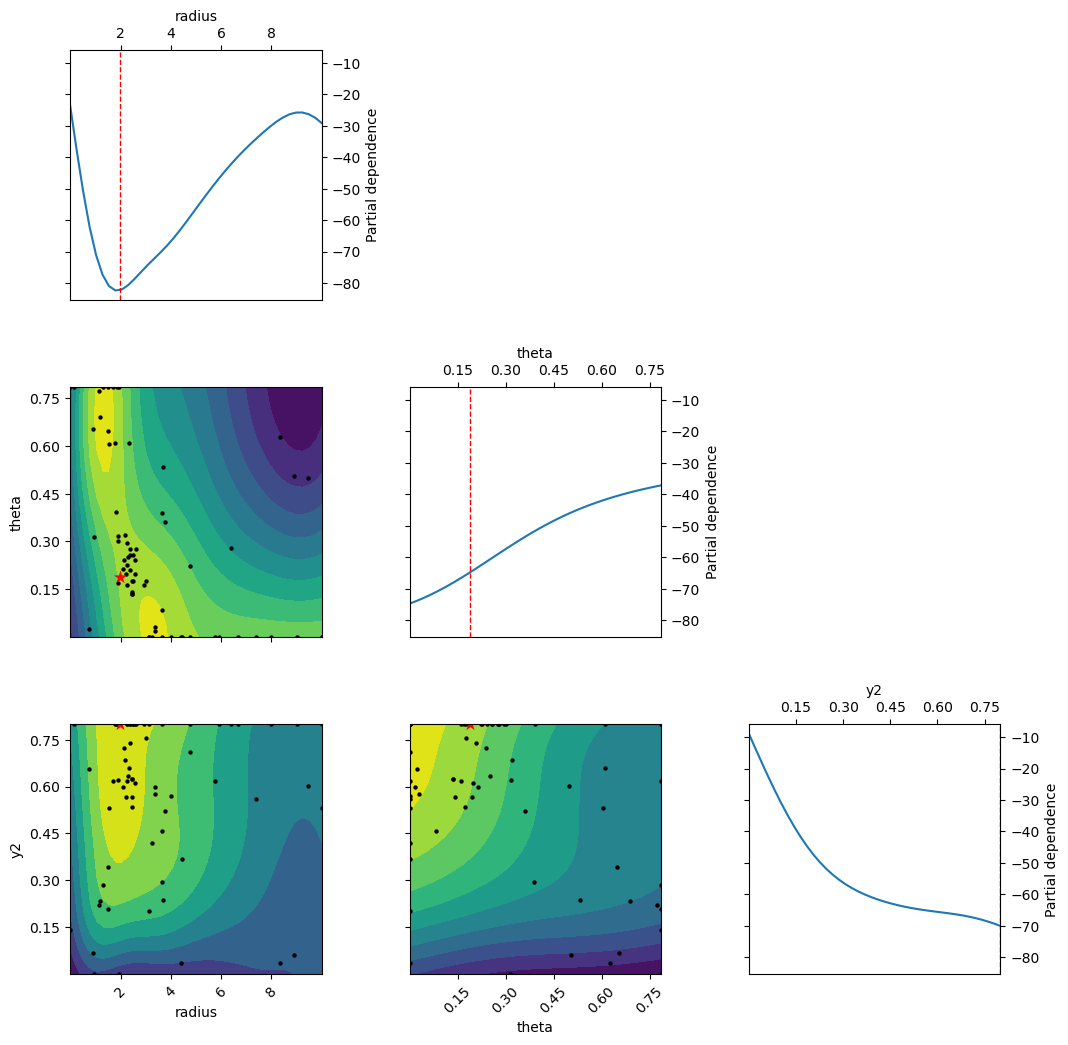

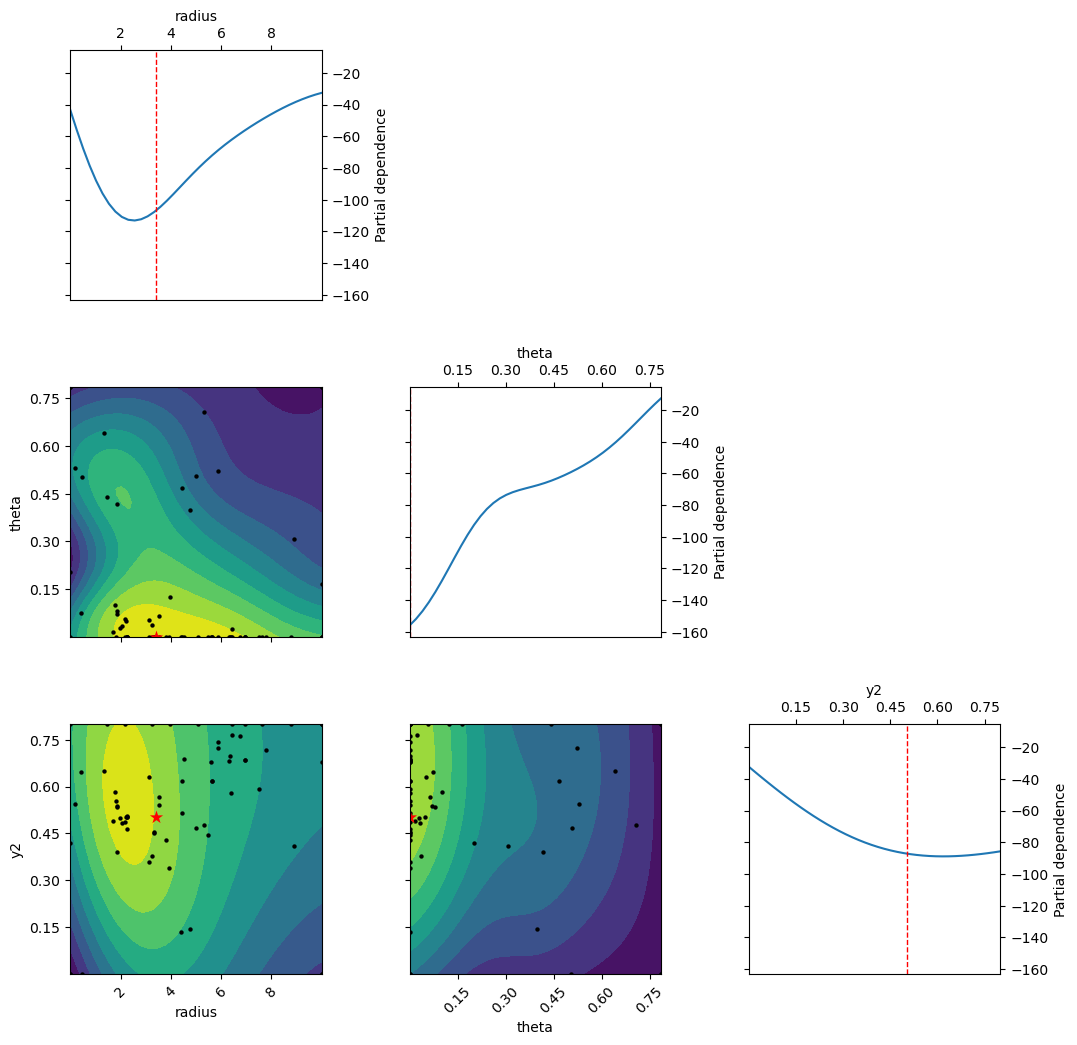

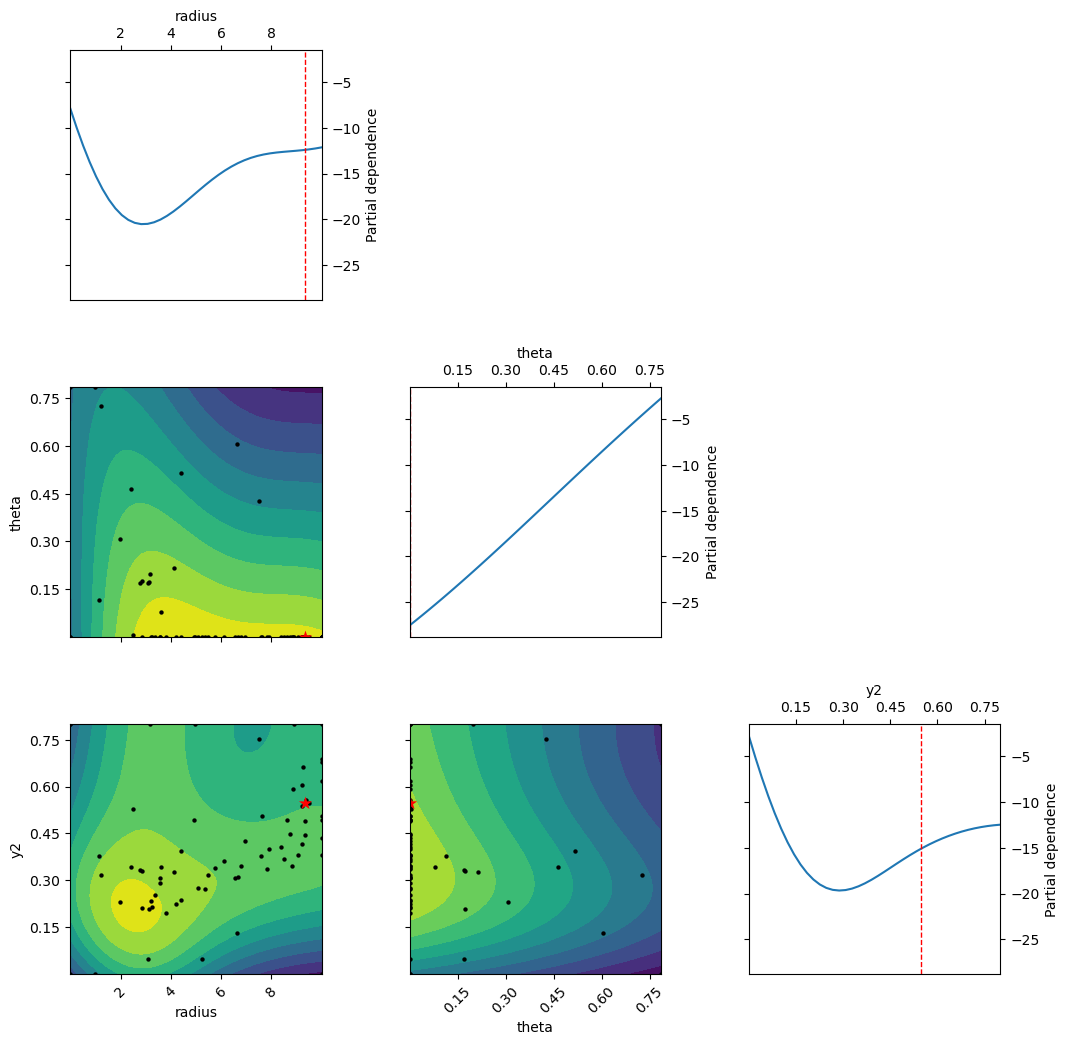

In [6]:
(
    plot_objective(cr_UM1, size = 4),
    plot_objective(cr_UM2, size = 4),
    plot_objective(cr_UM3, size = 4),
)

(<Axes: >, <Axes: >, <Axes: >)

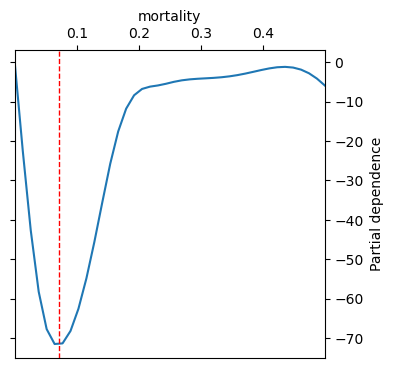

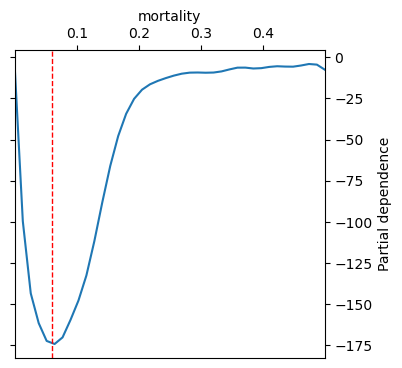

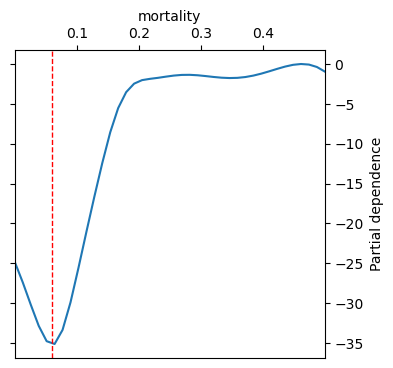

In [7]:
(
    plot_objective(msy_UM1, size = 4),
    plot_objective(msy_UM2, size = 4),
    plot_objective(msy_UM3, size = 4),
)